Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

- [X] Choose your target. Which column in your tabular dataset will you predict?
- [X] Is your problem regression or classification?
- [X] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [X] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

## Setup

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.style as style 
style.use('ggplot')

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


In [2]:
testing = True #Set this to true for submission/False for cross validation
DATA_PATH = '../data/'
train_df = pd.merge(pd.read_csv(DATA_PATH+'navigate/X_train.csv'),
         pd.read_csv(DATA_PATH+'navigate/y_train.csv'),on='series_id')
test = pd.read_csv(DATA_PATH+'navigate/X_test.csv')
train_df.shape, test.shape

((487680, 15), (488448, 13))

In [3]:
train_df.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,group_id,surface
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532,13,fine_concrete
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128,13,fine_concrete
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267,13,fine_concrete
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960,13,fine_concrete
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410,13,fine_concrete


In [4]:
test.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,0.91208,-0.38193,-0.050618,0.14028,-0.060205,0.071286,-0.18787,0.29492,2.8027,-9.6816
1,0_1,0,1,0.91220,-0.38165,-0.050573,0.14028,-0.033486,0.060210,-0.18206,0.14944,2.5408,-9.8521
2,0_2,0,2,0.91228,-0.38143,-0.050586,0.14032,-0.029686,0.029476,-0.18441,-0.49741,2.5853,-9.3835
3,0_3,0,3,0.91237,-0.38121,-0.050588,0.14035,-0.024217,0.037788,-0.18783,-0.32376,2.9966,-8.7415
4,0_4,0,4,0.91247,-0.38096,-0.050546,0.14042,-0.038047,0.083405,-0.20170,-0.70103,2.6498,-8.8432


In [5]:
# Predicting shot made
target = 'surface'

train_features = train_df.drop(columns=[target, 'group_id', 'row_id', 'series_id'])
features = train_features.columns.tolist()


# seperate target and features
X_train = train_df[features]
y_train = train_df[target]
X_test = test[features]

## Exploration

In [6]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(train, minimal=True)

#profile.to_notebook_iframe()

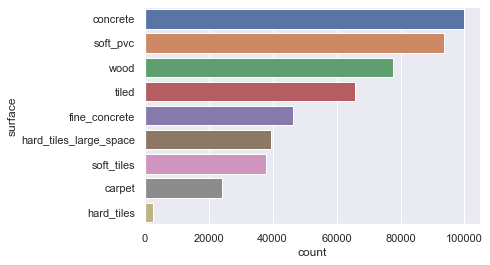

In [7]:
sns.set(style='darkgrid')
sns.countplot(y = 'surface',
              data = train_df,
              order = train_df['surface'].value_counts().index)
plt.show()

In [8]:
# each series of measurment has 128 measurments
len(train_df['measurement_number'].value_counts())

128

In [9]:
#allows any series to be visualized
series_dict = {}
for series in (train_df['series_id'].unique()):
    series_dict[series] = train_df[train_df['series_id'] == series]

In [20]:
def plotSeries(series_id):
    style.use('ggplot')
    plt.figure(figsize=(28, 16))
    print(train_df[train_df['series_id'] == series_id]['surface'].values[0].title())
    for i, col in enumerate(series_dict[series_id].columns[3:]):
        if col.startswith("o"):
            color = 'red'
        elif col.startswith("a"):
            color = 'green'
        else:
            color = 'blue'
        if i >= 7:
            i+=1
        plt.subplot(3, 5, i + 1)
        plt.plot(series_dict[series_id][col], color=color, linewidth=3)
        plt.title(col)

Carpet


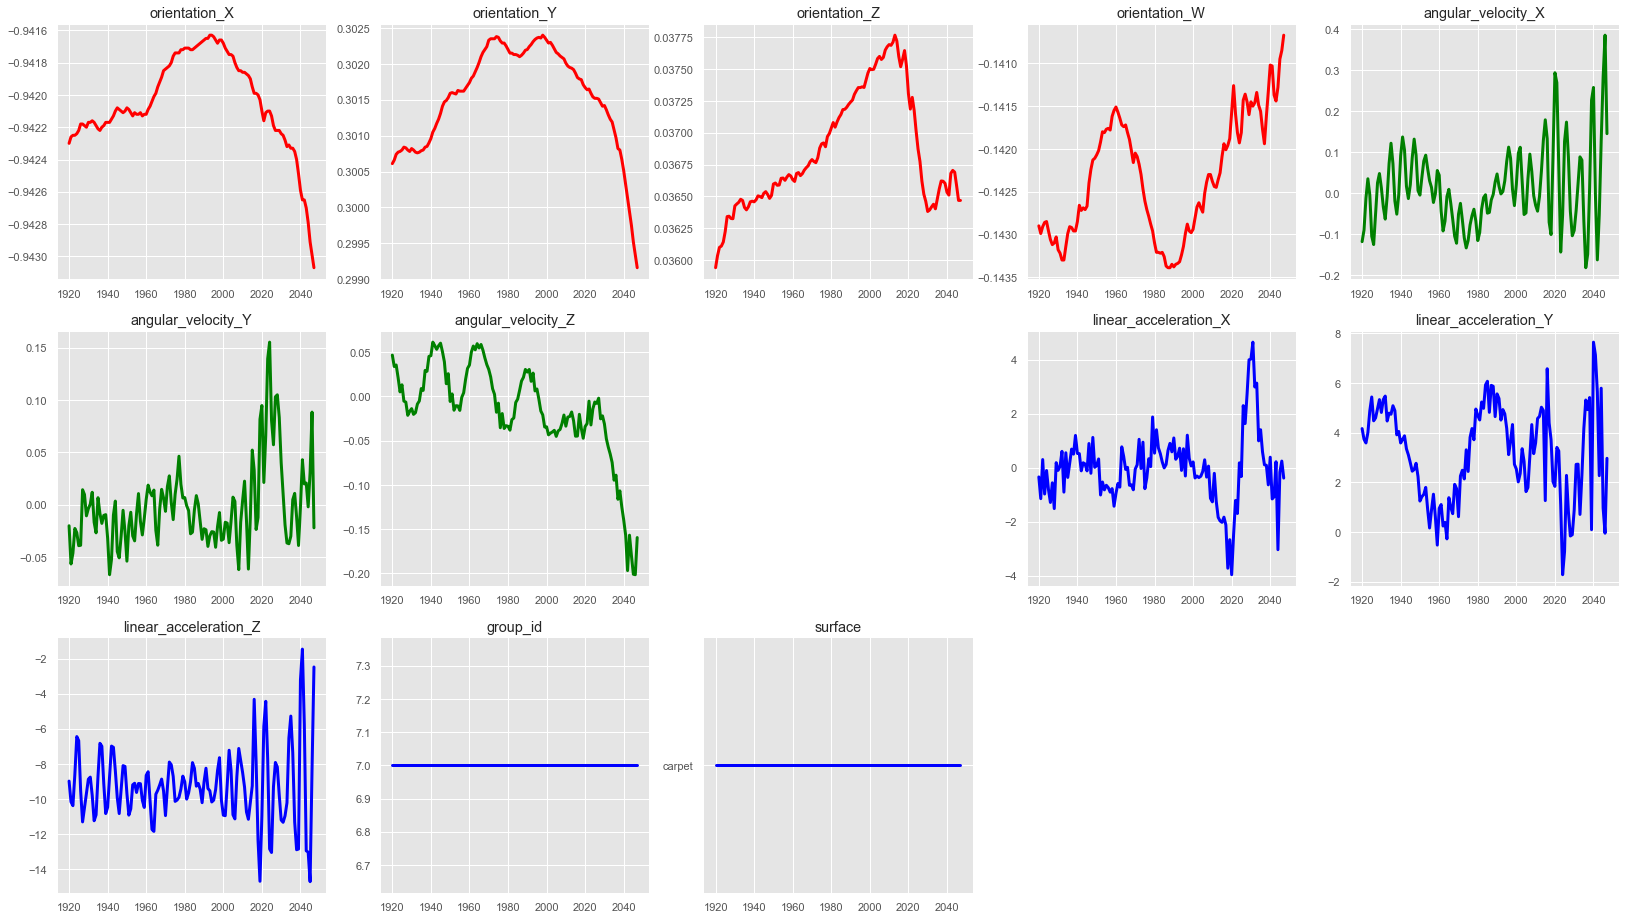

In [21]:
plotSeries(15)

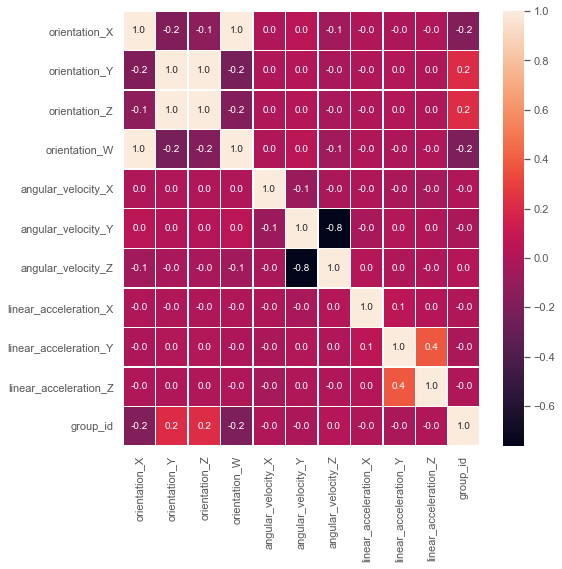

In [22]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(train_df.iloc[:,3:].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [27]:
def plot_feature_distribution(df1, df2, label1, label2, features,a=2,b=5):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(a,b,figsize=(17,9))

    for feature in features:
        i += 1
        plt.subplot(a,b,i)
        sns.kdeplot(df1[feature], bw=0.5,label=label1)
        sns.kdeplot(df2[feature], bw=0.5,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=8)
        plt.tick_params(axis='y', which='major', labelsize=8)
    plt.show();

ValueError: num must be 1 <= num <= 10, not 11

<Figure size 432x288 with 0 Axes>

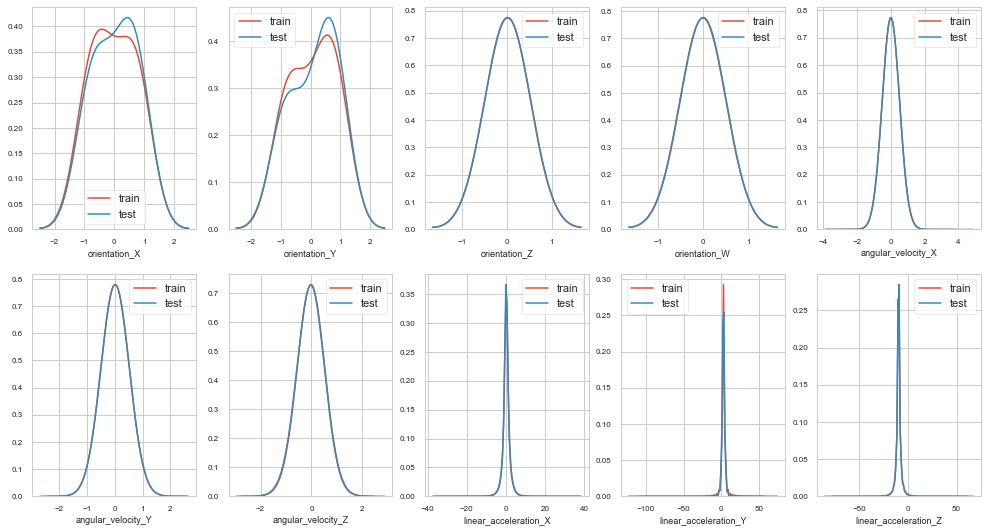

In [28]:
features = train_df.columns.values[3:]
plot_feature_distribution(train_df, test, 'train', 'test', features)

## Assignment work Work

In [31]:
# My Target
# my object is going to be helping robots to recognize the floor surface they’re standing on
# ultimately surface is what I'm trying to predict
y = train_df['surface']

# My problem is multi-class classification 

### target

In [33]:
print(f'My target has {y.nunique()} classes')

9


In [34]:

y.value_counts(normalize=True)

concrete                  0.204462
soft_pvc                  0.192126
wood                      0.159318
tiled                     0.134908
fine_concrete             0.095276
hard_tiles_large_space    0.080840
soft_tiles                0.077953
carpet                    0.049606
hard_tiles                0.005512
Name: surface, dtype: float64